In [30]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import numpy as np

In [31]:
PER_UNIT_GDP = 'Per unit GDP'
ROAD_DENSITY = 'Road density'
POPULATION_DENSITY = 'Population density'
ELEVATION = 'Elevation'
SLOPE = 'Slope'
RAINFALL_FREQUENCY = 'Rainfall frequency'
RIVER_DENSITY = 'River density'
RAINFALL_AMOUNT = 'Rainfall amount'
FLOOD = 'Flood'

In [32]:
# population density
# popolazione 

In [33]:
values_dictionary = {
    PER_UNIT_GDP: [
        [0.3], 
        [0.63], 
        [0.07]
    ],
    POPULATION_DENSITY: [
        [0.7, 0.3, 0.05],
        [0.2, 0.55, 0.25],
        [0.1, 0.15, 0.7],
    ],
    ROAD_DENSITY: [
        [0.8, 0.7, 0.1, 0.6, 0.4, 0.1, 0.1, 0.05, 0.01],
        [0.19, 0.25, 0.35, 0.3, 0.5, 0.25, 0.25, 0.2, 0.15],
        [0.01, 0.05, 0.55, 0.1, 0.1, 0.65, 0.65, 0.75, 0.84]
    ],
    ELEVATION: [
        [0.15],
        [0.1], 
        [0.75]
    ],
    SLOPE: [
        [0.75, 0.6, 0.05], 
        [0.25, 0.4, 0.95]
    ],
    RAINFALL_FREQUENCY: [
        [0.3], 
        [0.6], 
        [0.1]
    ],
    RIVER_DENSITY: [
        [0.45], 
        [0.55]
    ],
    RAINFALL_AMOUNT: [
        [0.7, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.2, 0.7, 0.7, 0.7, 0.7, 0.7],
        [0.1, 0.2, 0.2, 0.2, 0.2, 0.2]
    ],
    FLOOD: [
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
    ],
}

In [34]:
table_dictionary = {
    PER_UNIT_GDP: ['High', 'Medium', 'Low'],
    ROAD_DENSITY: ['Dense', 'Medium', 'Sparse'],
    POPULATION_DENSITY: ['Dense', 'Medium', 'Sparse'],
    ELEVATION: ['High', 'Medium', 'Low'],
    SLOPE: ['Steep', 'Flat'],
    RAINFALL_FREQUENCY: ['Frequent', 'Medium', 'Rare'],
    RIVER_DENSITY: ['Dense', 'Sparse'],
    RAINFALL_AMOUNT: ['Huge', 'Medium', 'Little'],
    FLOOD: ['Yes', 'No']
}

In [35]:
edges = [
    (PER_UNIT_GDP, ROAD_DENSITY), 
    (PER_UNIT_GDP, POPULATION_DENSITY), 
    (POPULATION_DENSITY, ROAD_DENSITY),
    (ROAD_DENSITY, FLOOD),
    (ELEVATION, SLOPE),
    (SLOPE, FLOOD),
    (RAINFALL_FREQUENCY, RAINFALL_AMOUNT),
    (RIVER_DENSITY, RAINFALL_AMOUNT),
    (RAINFALL_AMOUNT, FLOOD)
]

In [36]:
# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel(edges)

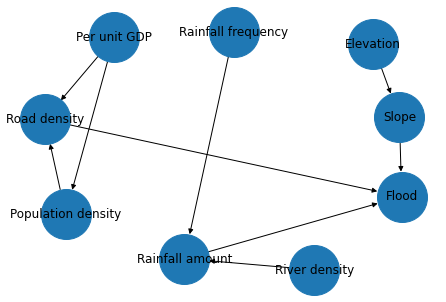

In [37]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(model, node_size=2500, with_labels=True)
plt.show()

In [38]:
def pick_dictionary_subset(dictionary, keys):
    return dict((k, dictionary[k]) for k in keys if k in dictionary)

import pandas as pd
from io import StringIO

def pcd_to_pandas(pcd):
    tabulate_string = str(pcd)
    #header = (pd.read_csv(StringIO(tabulate_string), sep=r'\|' , comment='+', engine='python', 
     #                     nrows=pcd.variable_card, header=None)
     #            .dropna(how='all', axis=1))
    data = (pd.read_csv(StringIO(tabulate_string), sep=r'\|', comment='+', engine='python', 
                        #skiprows=pcd.variable_card,
                        skipinitialspace=True,
                        header=[i for i in range(0, pcd.variable_card - 1)]).dropna(how='all', axis=1))

    #print(header.T[0])
    #data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

    
    # Replace data's RangeIndex with column labels. 
    #data.columns = data.columns.map(header.T[0].str.strip().to_dict())
    data.set_index(data.columns[0], inplace=True, drop = True)
    data.index.name = None
    return data

In [39]:
# ToDo: an idea can be to set the evidence, its cardinality and the state_names programmatically, 
# or even define these tables in a for loop

cpd_per_unit_gdp = TabularCPD(
    variable = PER_UNIT_GDP, 
    variable_card = len(table_dictionary[PER_UNIT_GDP]), 
    values = values_dictionary[PER_UNIT_GDP],
    state_names= pick_dictionary_subset(table_dictionary, [PER_UNIT_GDP])
)


cpd_population_density = TabularCPD(
    variable = POPULATION_DENSITY, 
    variable_card = len(table_dictionary[POPULATION_DENSITY]), 
    values = values_dictionary[POPULATION_DENSITY],
    evidence=[PER_UNIT_GDP],
    evidence_card=[len(table_dictionary[PER_UNIT_GDP])],
    state_names= pick_dictionary_subset(
        table_dictionary, [POPULATION_DENSITY, PER_UNIT_GDP]
    )
)

cpd_road_density = TabularCPD(
    variable = ROAD_DENSITY, 
    variable_card = len(table_dictionary[ROAD_DENSITY]), 
    values = values_dictionary[ROAD_DENSITY],
    evidence=[PER_UNIT_GDP, POPULATION_DENSITY],
    evidence_card=[len(table_dictionary[PER_UNIT_GDP]), len(table_dictionary[POPULATION_DENSITY])],
    state_names= pick_dictionary_subset(
        table_dictionary, [ROAD_DENSITY, PER_UNIT_GDP, POPULATION_DENSITY]
    )
)

cpd_rainfall_amount = TabularCPD(
    variable = ROAD_DENSITY, 
    variable_card = len(table_dictionary[ROAD_DENSITY]), 
    values = values_dictionary[ROAD_DENSITY],
    evidence=[PER_UNIT_GDP, POPULATION_DENSITY],
    evidence_card=[len(table_dictionary[PER_UNIT_GDP]), len(table_dictionary[POPULATION_DENSITY])],
    state_names= pick_dictionary_subset(
        table_dictionary, [RAINFALL_AMOUNT, PER_UNIT_GDP, POPULATION_DENSITY,]
    )
)

In [40]:
print(cpd_road_density)

+----------------------+--------------------------+----------------------------+-------------------------+--------------------------+----------------------------+-------------------------+--------------------------+----------------------------+-------------------------+
| Per unit GDP         | Per unit GDP(High)       | Per unit GDP(High)         | Per unit GDP(High)      | Per unit GDP(Medium)     | Per unit GDP(Medium)       | Per unit GDP(Medium)    | Per unit GDP(Low)        | Per unit GDP(Low)          | Per unit GDP(Low)       |
+----------------------+--------------------------+----------------------------+-------------------------+--------------------------+----------------------------+-------------------------+--------------------------+----------------------------+-------------------------+
| Population density   | Population density(High) | Population density(Medium) | Population density(Low) | Population density(High) | Population density(Medium) | Population density(Low) 

In [41]:
pcd_to_pandas(cpd_road_density)

,Per unit GDP(High),Per unit GDP(High),Per unit GDP(High),Per unit GDP(Medium),Per unit GDP(Medium),Per unit GDP(Medium),Per unit GDP(Low),Per unit GDP(Low),Per unit GDP(Low)
,Population density(High),Population density(Medium),Population density(Low),Population density(High),Population density(Medium),Population density(Low),Population density(High),Population density(Medium),Population density(Low)
Road density(Prova1),0.80,0.70,0.10,0.6,0.4,0.10,0.10,0.05,0.01
Road density(Prova2),0.19,0.25,0.35,0.3,0.5,0.25,0.25,0.20,0.15
Road density(Prova3),0.01,0.05,0.55,0.1,0.1,0.65,0.65,0.75,0.84
